# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [33]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "rose of sharon" 
icon_path = "%s.png" % icon

### 데이터 입력

In [35]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Independence Movement Day_speech.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

존경하는 국민 여러분, 해외 동포 여러분,

3.1운동 아흔 아홉돌입니다.
3.1운동은 지금 이 순간 우리의 삶에 생생하게 살아 있습니다.
서대문형무소의 벽돌 하나하나에는 고난과 죽음에 맞선 숭고한 이야기들이 새겨져 있습니다.
대한독립 만세의 외침이 들려오는 것 같습니다.

오늘 우리는 박제화된 기념식이 아니라 독립운동의 현장에서 역사와 함께 살아 숨 쉬는 기념식을 하고자 이 자리에 모였습니다.

일제 강점기 동안 해마다 2천600여 명이 서대문형무소에 투옥되었습니다.
1945년 8월 15일 해방의 그 날까지 10만여 명 가까이 이곳에 수감되었습니다.
열 명 중 아홉 명이 사상범이라고 불린 독립운동가였습니다.

10대 청소년부터 어르신까지, 남쪽의 제주도에서 북쪽의 함경도까지, 나이와 지역을 막론하고 조국의 독립을 위해 실천했던 분들이었습니다.
어머니와 아들, 아버지와 딸, 형제자매가 함께 투옥되기도 했습니다.

수많은 어머니와 아내들이 이곳 형무소 앞 골목에서 삯바느질과 막일을 해가며 자식과 남편의 옥바라지를 했습니다.
수감자뿐 아니라 그 가족들도 모두 독립운동가였습니다.


국민 여러분,

99년 전 오늘, 마을과 장터에 격문이 붙었습니다.
독립선언서가 손에서 손으로 전달되었습니다.
서울과 평양, 진남포, 안주, 의주, 정주, 선천, 원산 등 전국 각지에서 동시에 독립선언서가 낭독되고 만세 시위가 시작되었습니다.
만세 운동은 순식간에 지방도시와 읍면까지 확대되었습니다.

멀리 중국의 간도와 러시아의 연해주, 미국 필라델피아와 하와이 호놀룰루의 하늘에도 독립만세의 함성이 울려퍼졌습니다.

그해 3월 1일부터 5월 말까지 국내에서만 무려 1,542회의 만세 시위가 일어났고, 당시 인구의 10분의 1을 넘는 2백2만여 명이 이에 참가했습니다.

3.1운동의 경험과 기억은 일제 강점기 내내 치열했던 항일 독립투쟁의 정신적 토대가 됐습니다.

3.1운동 이후, 수백 수천 명의 독립군이 매일같이 압록강과 두만강을 건넜습니다.
대한국민회, 북로군정서, 대한독립군, 군무

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [36]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['존경하는 국민 여러분, 해외 동포 여러분,',
 '3.1운동 아흔 아홉돌입니다.\n3.1운동은 지금 이 순간 우리의 삶에 생생하게 살아 있습니다.\n서대문형무소의 벽돌 하나하나에는 고난과 죽음에 맞선 숭고한 이야기들이 새겨져 있습니다.\n대한독립 만세의 외침이 들려오는 것 같습니다.',
 '오늘 우리는 박제화된 기념식이 아니라 독립운동의 현장에서 역사와 함께 살아 숨 쉬는 기념식을 하고자 이 자리에 모였습니다.',
 '일제 강점기 동안 해마다 2천600여 명이 서대문형무소에 투옥되었습니다.\n1945년 8월 15일 해방의 그 날까지 10만여 명 가까이 이곳에 수감되었습니다.\n열 명 중 아홉 명이 사상범이라고 불린 독립운동가였습니다.',
 '10대 청소년부터 어르신까지, 남쪽의 제주도에서 북쪽의 함경도까지, 나이와 지역을 막론하고 조국의 독립을 위해 실천했던 분들이었습니다.\n어머니와 아들, 아버지와 딸, 형제자매가 함께 투옥되기도 했습니다.',
 '수많은 어머니와 아내들이 이곳 형무소 앞 골목에서 삯바느질과 막일을 해가며 자식과 남편의 옥바라지를 했습니다.\n수감자뿐 아니라 그 가족들도 모두 독립운동가였습니다.',
 '\n국민 여러분,',
 '99년 전 오늘, 마을과 장터에 격문이 붙었습니다.\n독립선언서가 손에서 손으로 전달되었습니다.\n서울과 평양, 진남포, 안주, 의주, 정주, 선천, 원산 등 전국 각지에서 동시에 독립선언서가 낭독되고 만세 시위가 시작되었습니다.\n만세 운동은 순식간에 지방도시와 읍면까지 확대되었습니다.',
 '멀리 중국의 간도와 러시아의 연해주, 미국 필라델피아와 하와이 호놀룰루의 하늘에도 독립만세의 함성이 울려퍼졌습니다.',
 '그해 3월 1일부터 5월 말까지 국내에서만 무려 1,542회의 만세 시위가 일어났고, 당시 인구의 10분의 1을 넘는 2백2만여 명이 이에 참가했습니다.',
 '3.1운동의 경험과 기억은 일제 강점기 내내 치열했던 항일 독립투쟁의 정신적 토대가 됐습니다.',
 '3.1운동 이후, 수백 수천 명의 독립군이

In [37]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<43x689 sparse matrix of type '<class 'numpy.int64'>'
	with 836 stored elements in Compressed Sparse Row format>

In [38]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

689
689


['100년으로',
 '100년의',
 '100주년에',
 '100주년을',
 '10대',
 '10만여',
 '10분의',
 '15일',
 '1932년',
 '1937년',
 '1940년에는',
 '1945년',
 '1운동',
 '1운동과',
 '1운동에',
 '1운동으로',
 '1운동은',
 '1운동을',
 '1운동의',
 '1운동이라는',
 '1운동이었습니다',
 '1운동입니다',
 '1을',
 '1일부터',
 '1천7백만',
 '2020년',
 '29일',
 '2백2만여',
 '2세대와',
 '2천600여',
 '3세대가',
 '3월',
 '3천600건의',
 '46세의',
 '4월',
 '542회의',
 '5월',
 '6차례나',
 '8월',
 '99년',
 '9일',
 '가까운',
 '가까이',
 '가는',
 '가능하다는',
 '가입한',
 '가장',
 '가져온',
 '가족들도',
 '가한',
 '가해자인',
 '각지에서',
 '간도와',
 '감사합니다',
 '강우규',
 '강점기',
 '강점당한',
 '강직한',
 '같습니다',
 '개의',
 '거대한',
 '거부하는',
 '건국',
 '건국의',
 '건너',
 '건넜습니다',
 '걸어가길',
 '걸어갈',
 '것만이',
 '것은',
 '것을',
 '것이',
 '것이나',
 '것입니다',
 '겨울',
 '격문이',
 '격차와',
 '결과입니다',
 '결코',
 '경제공동체를',
 '경제발전과',
 '경험과',
 '계속',
 '계승하였다고',
 '계층',
 '고난과',
 '고문과',
 '고유의',
 '고통을',
 '골목에서',
 '곳곳',
 '공정하고',
 '과정에서',
 '곽낙원',
 '광복',
 '광복군',
 '광복군을',
 '광복군총사령부도',
 '광복은',
 '광복을',
 '광부도',
 '광부들',
 '구석구석에서',
 '구성하여',
 '구축과',
 '국가',
 '국경을',
 '국내에서',
 '국내에서만',
 '국내외',
 '국민',
 '국민들',
 '국민들께',
 '국민들의',
 '국민에게',

In [39]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['100년으로', '100년의', '100주년에', '100주년을', '10대', '10만여', '10분의', '15일', '1932년', '1937년', '1940년에는', '1945년', '1운동', '1운동과', '1운동에', '1운동으로', '1운동은', '1운동을', '1운동의', '1운동이라는', '1운동이었습니다', '1운동입니다', '1을', '1일부터', '1천7백만', '2020년', '29일', '2백2만여', '2세대와', '2천600여', '3세대가', '3월', '3천600건의', '46세의', '4월', '542회의', '5월', '6차례나', '8월', '99년', '9일', '가까운', '가까이', '가는', '가능하다는', '가입한', '가장', '가져온', '가족들도', '가한', '가해자인', '각지에서', '간도와', '감사합니다', '강우규', '강점기', '강점당한', '강직한', '같습니다', '개의', '거대한', '거부하는', '건국', '건국의', '건너', '건넜습니다', '걸어가길', '걸어갈', '것만이', '것은', '것을', '것이', '것이나', '것입니다', '겨울', '격문이', '격차와', '결과입니다', '결코', '경제공동체를', '경제발전과', '경험과', '계속', '계승하였다고', '계층', '고난과', '고문과', '고유의', '고통을', '골목에서', '곳곳', '공정하고', '과정에서', '곽낙원', '광복', '광복군', '광복군을', '광복군총사령부도', '광복은', '광복을', '광부도', '광부들', '구석구석에서', '구성하여', '구축과', '국가', '국경을', '국내에서', '국내에서만', '국내외', '국민', '국민들', '국민들께', '국민들의', '국민에게', '국민의', '국민이', '국민주권과', '국민주권을', '국민주권의', '국호와', '군경과', '군대인', '군무도독부', '그것이', '그러기', '그린', '그저', '그해', '근우회', '기념

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 5, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 8, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       6, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3,

In [40]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'100년으로': 1,
 '100년의': 1,
 '100주년에': 1,
 '100주년을': 2,
 '10대': 1,
 '10만여': 1,
 '10분의': 1,
 '15일': 1,
 '1932년': 1,
 '1937년': 1,
 '1940년에는': 1,
 '1945년': 1,
 '1운동': 3,
 '1운동과': 1,
 '1운동에': 1,
 '1운동으로': 2,
 '1운동은': 1,
 '1운동을': 1,
 '1운동의': 5,
 '1운동이라는': 2,
 '1운동이었습니다': 1,
 '1운동입니다': 1,
 '1을': 1,
 '1일부터': 1,
 '1천7백만': 1,
 '2020년': 1,
 '29일': 1,
 '2백2만여': 1,
 '2세대와': 1,
 '2천600여': 1,
 '3세대가': 1,
 '3월': 2,
 '3천600건의': 1,
 '46세의': 1,
 '4월': 1,
 '542회의': 1,
 '5월': 1,
 '6차례나': 1,
 '8월': 1,
 '99년': 2,
 '9일': 1,
 '가까운': 1,
 '가까이': 1,
 '가는': 1,
 '가능하다는': 1,
 '가입한': 1,
 '가장': 5,
 '가져온': 1,
 '가족들도': 1,
 '가한': 1,
 '가해자인': 1,
 '각지에서': 1,
 '간도와': 1,
 '감사합니다': 1,
 '강우규': 1,
 '강점기': 2,
 '강점당한': 1,
 '강직한': 1,
 '같습니다': 1,
 '개의': 1,
 '거대한': 3,
 '거부하는': 1,
 '건국': 3,
 '건국의': 2,
 '건너': 1,
 '건넜습니다': 1,
 '걸어가길': 1,
 '걸어갈': 1,
 '것만이': 1,
 '것은': 1,
 '것을': 2,
 '것이': 2,
 '것이나': 1,
 '것입니다': 8,
 '겨울': 1,
 '격문이': 1,
 '격차와': 1,
 '결과입니다': 1,
 '결코': 2,
 '경제공동체를': 1,
 '경제발전과': 1,
 '경험과': 1,
 '계속': 1,
 '계승하였다고': 1,
 '계층': 1,

### 시각화

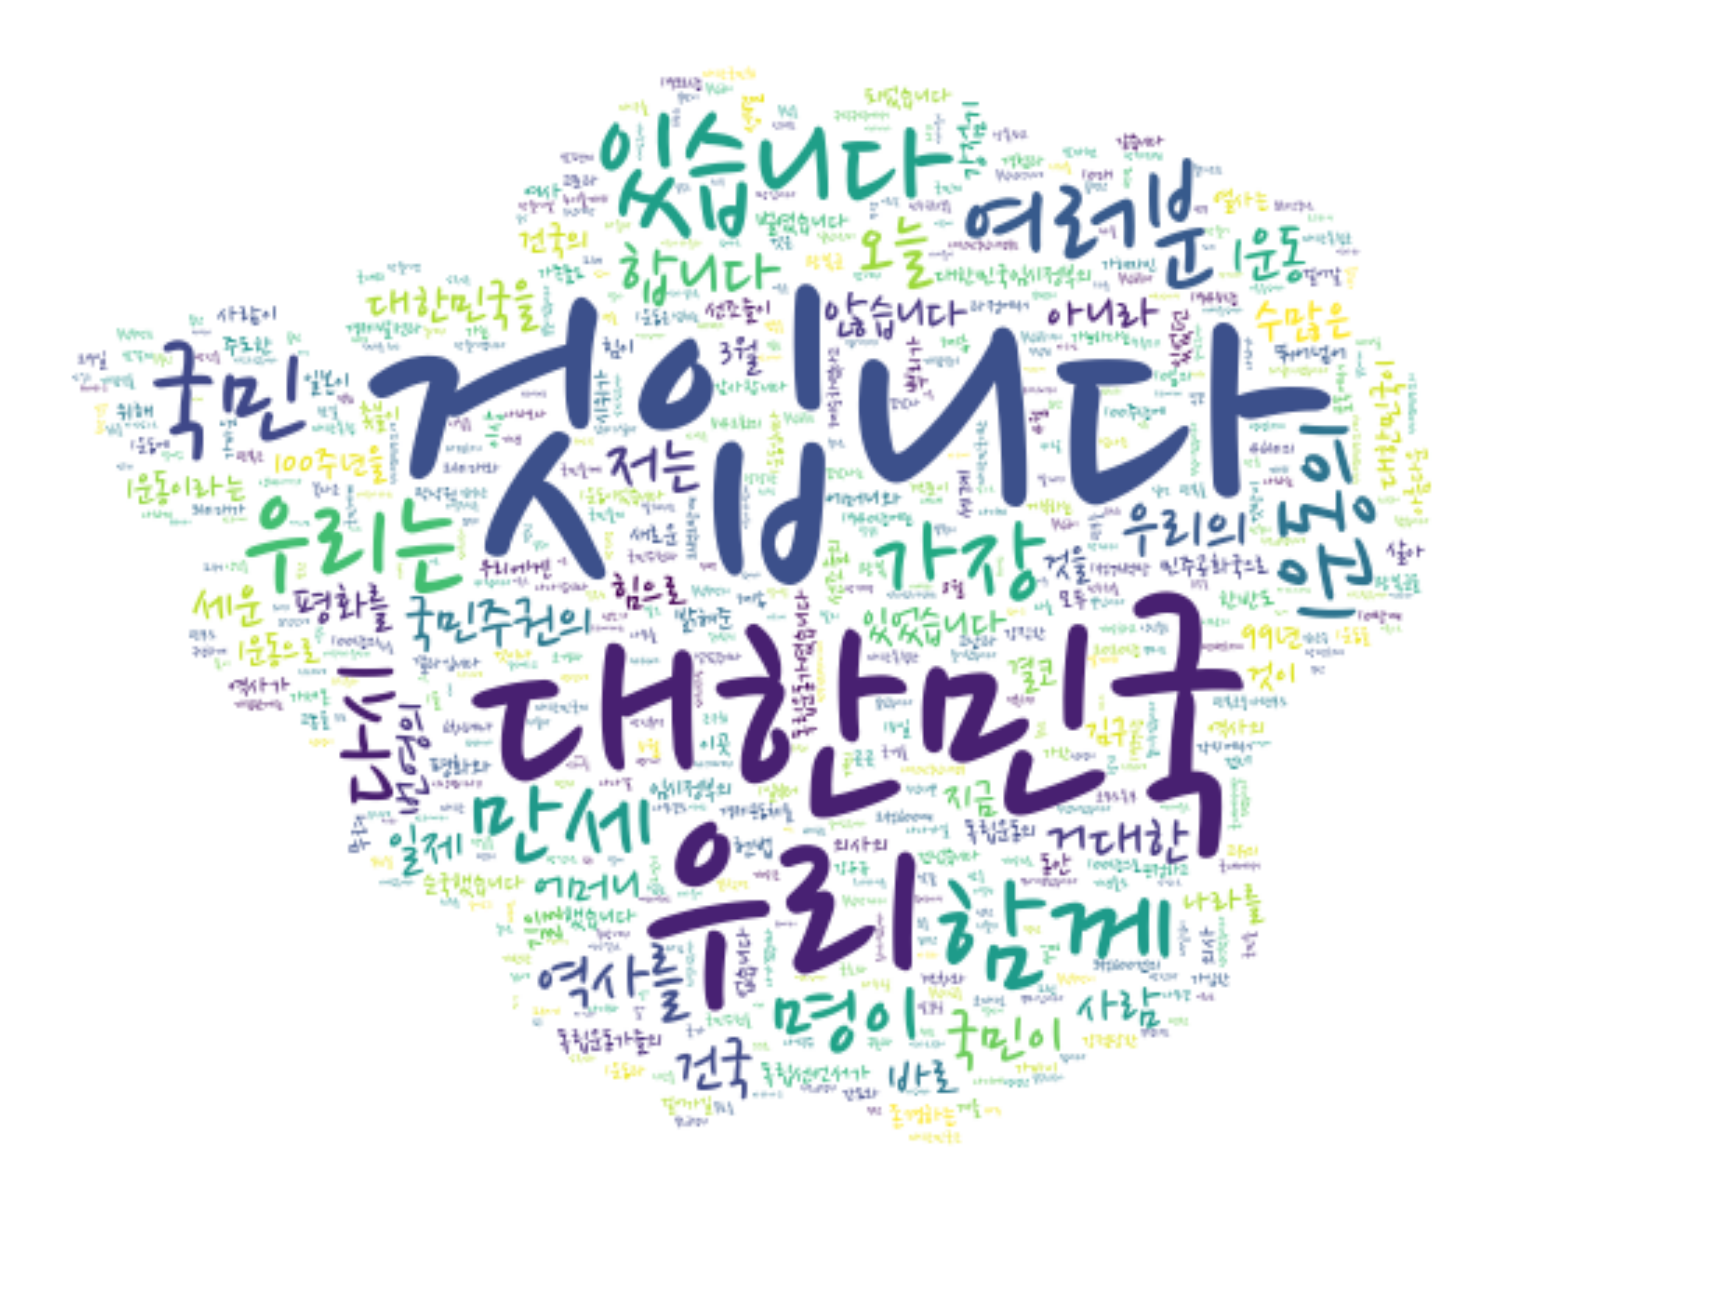

In [43]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기